In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import autocorrelation_plot
from pmdarima import auto_arima

In [2]:
df = pd.read_csv(r"D:\EOY Datasets\Full Datasets\Everything_cleaned.csv",index_col=0)

C:\Users\ellio\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
#df = df.reset_index(drop=True)

In [4]:
df.head()

,Crime_ID,Month,Reported_by,Crime_type,Outcome_type,Year,Level_of_Lockdown,Region
0,e9a50727f2189e0c50f704e3661bc1a8ae3a39aece4866...,2019-01,Avon and Somerset,Violence and sexual offences,No suspect identified,2019,No Lockdown,South West
1,fb06f54e9d633a961109ef74171e4beb40b2fe44e57a10...,2019-01,Avon and Somerset,Violence and sexual offences,Unable to prosecute suspect,2019,No Lockdown,South West
2,4655ba031d5c8d00b247577a22472fbb8f9130d98b7d95...,2019-01,Avon and Somerset,Violence and sexual offences,No suspect identified,2019,No Lockdown,South West
3,2830f28a4a93138717182d1cc51b6d77cfaf3c27398934...,2019-01,Avon and Somerset,Theft offences,No suspect identified,2019,No Lockdown,South West
4,ca01d599d45f6e1d1bc5b05ddc6a1b559870fc831baa8e...,2019-01,Avon and Somerset,Theft offences,No suspect identified,2019,No Lockdown,South West


In [59]:
df['Crime_type'].value_counts()

Violence and sexual offences    4543174
Theft offences                  2837513
Criminal damage and arson       1242544
Public order offences           1110695
Drug offences                    441986
Name: Crime_type, dtype: int64

In [6]:
df.Month = pd.to_datetime(df['Month'], format='%Y-%m')

In [7]:
grouped = df.groupby(['Month','Crime_type'])['Crime_ID'].count()
grouped = grouped.reset_index().rename(columns={'Crime_ID':'Count'})

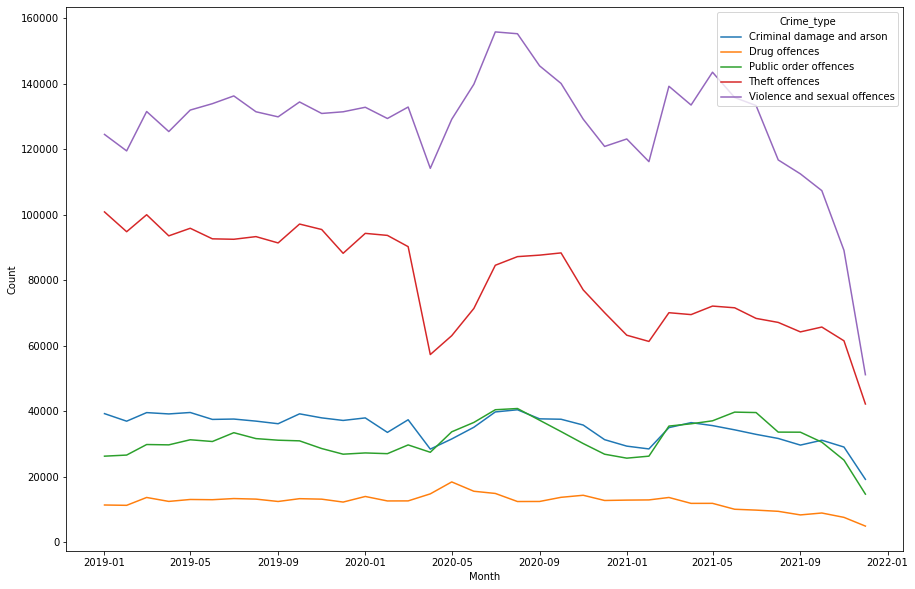

In [61]:
plt.figure(figsize=(15,10))
sns.lineplot(data=grouped,x='Month',y='Count', hue='Crime_type')
plt.show()

In [95]:
grouped

,Month,Crime_type,Count
0,2019-01-01,Criminal damage and arson,39310
1,2019-01-01,Drug offences,11424
2,2019-01-01,Public order offences,26327
3,2019-01-01,Theft offences,100874
4,2019-01-01,Violence and sexual offences,124529
...,...,...,...
175,2021-12-01,Criminal damage and arson,19252
176,2021-12-01,Drug offences,4987
177,2021-12-01,Public order offences,14742
178,2021-12-01,Theft offences,42251


<AxesSubplot:ylabel='Frequency'>

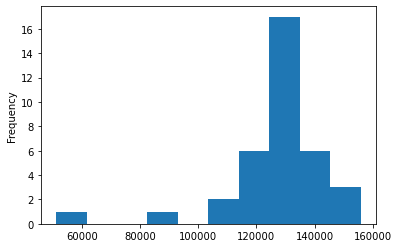

In [96]:
vio = grouped[grouped['Crime_type']=='Violence and sexual offences']
vio = vio.set_index('Month')
vio = vio['Count']
vio_cut = vio[0:12]
vio.plot.hist()

In [114]:
vio

Month
2019-01-01    124529
2019-02-01    119497
2019-03-01    131521
2019-04-01    125402
2019-05-01    131961
2019-06-01    133913
2019-07-01    136278
2019-08-01    131443
2019-09-01    129890
2019-10-01    134433
2019-11-01    130926
2019-12-01    131435
2020-01-01    132816
2020-02-01    129386
2020-03-01    132884
2020-04-01    114177
2020-05-01    129148
2020-06-01    139847
2020-07-01    155815
2020-08-01    155256
2020-09-01    145452
2020-10-01    140091
2020-11-01    129192
2020-12-01    120860
2021-01-01    123140
2021-02-01    116216
2021-03-01    139223
2021-04-01    133498
2021-05-01    143514
2021-06-01    135795
2021-07-01    133332
2021-08-01    116738
2021-09-01    112488
2021-10-01    107368
2021-11-01     89142
2021-12-01     51188
Name: Count, dtype: int64

In [97]:
from statsmodels.tsa.stattools import adfuller
adfuller(vio)[1]

0.9940593894569902

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

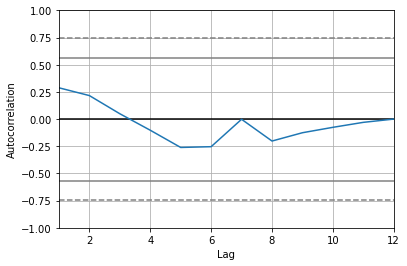

In [98]:
autocorrelation_plot(vio_cut)

In [99]:
train = vio_cut
train

Month
2019-01-01    124529
2019-02-01    119497
2019-03-01    131521
2019-04-01    125402
2019-05-01    131961
2019-06-01    133913
2019-07-01    136278
2019-08-01    131443
2019-09-01    129890
2019-10-01    134433
2019-11-01    130926
2019-12-01    131435
Name: Count, dtype: int64

In [100]:
stepwise_fit = auto_arima(train,trace=True,suppress_warnings=True,d=1)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14519059423554.135, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=224.068, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=224.758, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=230.503, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=222.219, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=218.786, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=216.504, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=218.361, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=218.404, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=218.849, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=217.441, Time=0.03 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=214.664, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=217.556, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AI

C:\Users\ellio\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(3,1,2)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\ellio\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\ellio\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\ellio\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\ellio\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 508, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "C:\Users\ellio\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 690, in fit
    mlefit = super(MLEModel, self).fit(start_param

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   12
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -103.332
Date:                Thu, 23 Jun 2022   AIC                            214.664
Time:                        13:28:45   BIC                            216.255
Sample:                             0   HQIC                           213.660
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4682      0.842     -0.556      0.578      -2.119       1.183
ar.L2          0.0836      0.355      0.236      0.814      -0.611       0.779
ma.L1          0.4336      0.887      0.489      0.625      -1.305       2.172
sigma2      1.106e+07   6.78e-08   1.63e+14      0.000    1.11e+07    1.11e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.69   Prob(JB):                         0.85
Heteroskedasticity (H):               5.81   Skew:                             0.13
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.74e+30. Standard errors may be unstable.
"""

In [112]:
from statsmodels.tsa.arima.model import ARIMA
train.index = pd.DatetimeIndex(train.index.values,
                               freq=train.index.inferred_freq)
model = ARIMA(train, order=(1,1,2),seasonal_order=(1,1,1,11))
model_fit = model.fit()
yhat = model_fit.predict(len(train), len(train)+19) 
print(yhat)


2020-01-01    126403.0
2020-02-01    138427.0
2020-03-01    132308.0
2020-04-01    138867.0
2020-05-01    140819.0
2020-06-01    143184.0
2020-07-01    138349.0
2020-08-01    136796.0
2020-09-01    141339.0
2020-10-01    137832.0
2020-11-01    138341.0
2020-12-01    133309.0
2021-01-01    145333.0
2021-02-01    139214.0
2021-03-01    145773.0
2021-04-01    147725.0
2021-05-01    150090.0
2021-06-01    145255.0
2021-07-01    143702.0
2021-08-01    148245.0
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\ellio\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\ellio\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\ellio\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1220: RuntimeWarning: invalid value encountered in true_divide
  np.inner(score_obs, score_obs) /


In [102]:
forecast = model_fit.get_forecast(20)
yhat_conf_int = forecast.conf_int(alpha=0.05)
yhat_conf_int

,lower Count,upper Count
2020-01-01,192313.625576,195085.436689
2020-02-01,187281.624190,190053.438075
2020-03-01,199305.622804,202077.439461
2020-04-01,193186.621418,195958.440847
2020-05-01,199745.620032,202517.442233
2020-06-01,201697.618646,204469.443618
2020-07-01,204062.617260,206834.445004
2020-08-01,199227.615874,201999.446390
2020-09-01,197674.614488,200446.447776
2020-10-01,202217.613102,204989.449162


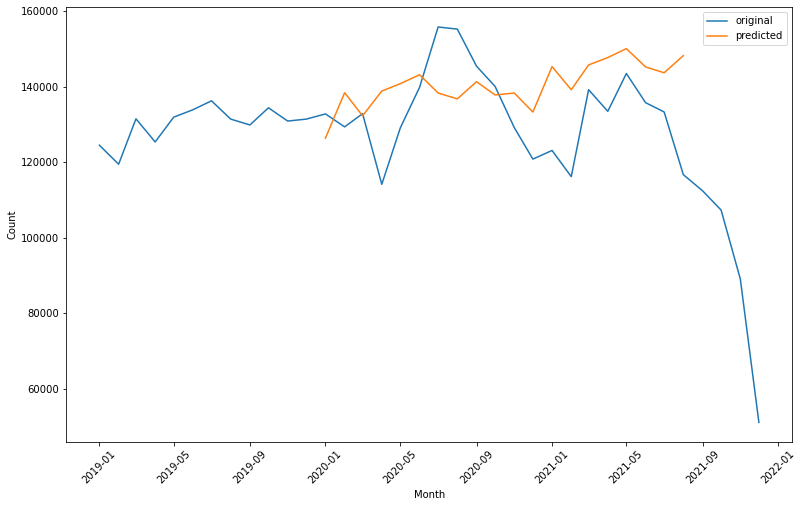

In [113]:
plt.figure(figsize=(13,8))
sns.lineplot(data=vio,label='original')
sns.lineplot(data=yhat,label='predicted')
#sns.lineplot(data=yhat_conf_int,label='blah')
plt.xticks(rotation = 45)
plt.legend()

In [104]:
vio_normed = vio/67220000*10000
yhat_normed = yhat/67220000*10000

(array([18262., 18322., 18383., 18444., 18506., 18567., 18628., 18687.,
        18748., 18809.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

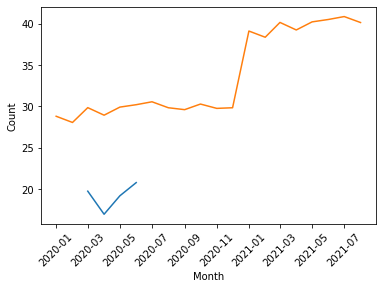

In [105]:
sns.lineplot(data=vio_normed[14:18])
sns.lineplot(data=yhat_normed)
plt.xticks(rotation = 45)

In [106]:
model = ARIMA(rolling_mean, order=(0,1,0))
model_fit = model.fit()
yhat2 = model_fit.predict(len(rolling_mean), len(rolling_mean)+4) 

NameError: name 'rolling_mean' is not defined